In [66]:
#Logistic Regression
# We will now be importing some required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

from scipy.stats.stats import pearsonr

def plot(x, xlabel, y, ylabel):
    plt.scatter(x, \
                y, \
                color="red", \
                alpha=0.1)
    plt.title(ylabel + ' by ' + xlabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    print("Pearson's correlation coefficient: ")
    print(pearsonr(x, y))

#Loading the dataset
load = pd.read_excel('atus/ehresp_2014.xlsx')

categorical_columns = ['eeincome1', \
                       'erhhch', \
                       'erincome', \
                       'erspemch', \
                       'ethgt', \
                       'etwgt', \
                       'eudietsoda', \
                       'eudrink', \
                       'eueat', \
                       'euexercise', \
                       'eufastfd', \
                       'euffyday', \
                       'eufdsit', \
                       'eusnap', \
                       'eugenhth', \
                       'eugroshp', \
                       'euinclvl', \
                       'euincome2', \
                       'eumeat', \
                       'eumilk', \
                       'euprpmel', \
                       'eusoda', \
                       'eustores', \
                       'eustreason', \
                       'eutherm', \
                       'euwic']

# Excluding `erbmi` because we're using this to determine our target
numerical_columns = ['ertpreat', \
                     'ertseat', \
                     'euexfreq', \
                     'eufastfdfrq', \
                     'euhgt', \
                     'euwgt']

all_columns = ['eeincome1', 'erhhch', 'erincome', 'erspemch', 'ertpreat', 'ertseat', 'ethgt', 'etwgt', 'eudietsoda', 'eudrink', 'eueat', 'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq', 'euffyday', 'eufdsit', 'eufinlwgt', 'eusnap', 'eugenhth', 'eugroshp', 'euhgt', 'euinclvl', 'euincome2', 'eumeat', 'eumilk', 'euprpmel', 'eusoda', 'eustores', 'eustreason', 'eutherm', 'euwgt', 'euwic', 'exincome1', 'erbmi']

target_column = ['erbmi']

In the cell below I rearranged the columns, placing BMI in the final column and removing the household and respondent IDs( TUCASEID, TULINENO), as those are not required for anything we're doing. 

In [67]:
dataset = load[['eeincome1', 'erhhch', 'erincome', 'erspemch', 'ertpreat', 'ertseat', 'ethgt', 'etwgt', 'eudietsoda', 'eudrink', 'eueat', 'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq', 'euffyday', 'eufdsit', 'eufinlwgt', 'eusnap', 'eugenhth', 'eugroshp', 'euhgt', 'euinclvl', 'euincome2', 'eumeat', 'eumilk', 'euprpmel', 'eusoda', 'eustores', 'eustreason', 'eutherm', 'euwgt', 'euwic', 'exincome1', 'erbmi']]

### Slice the data into numerical, categorical, and target datasets

In [68]:
dataset_numerical = dataset[numerical_columns]
dataset_categorical = dataset[categorical_columns]
dataset_target = dataset[target_column]

In [69]:
#X = dataset.iloc[:,1:34].values
column_count = dataset.shape[1]
X = dataset.iloc[:, 0:column_count-1].values
y = dataset.iloc[:,-1].values
print(X.shape)
print(y.shape)

(11212, 34)
(11212,)


### Plot all data before normalizing against BMI to understand the trends

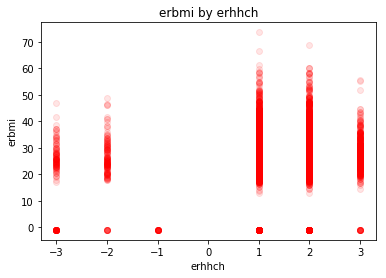

Pearson's correlation coefficient: 
(0.10635804557359958, 1.4260055297373536e-29)


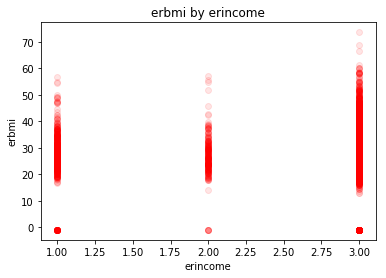

Pearson's correlation coefficient: 
(-0.008021430225496494, 0.39572439689399763)


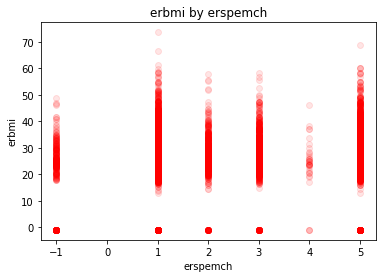

Pearson's correlation coefficient: 
(0.07896560886603507, 5.590538456859376e-17)


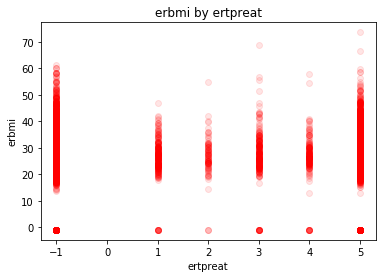

Pearson's correlation coefficient: 
(0.014647285828082675, 0.12093440043012973)


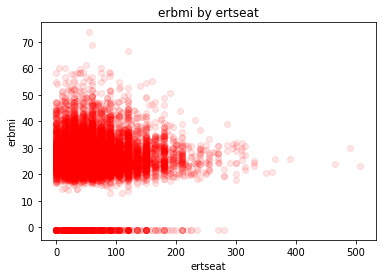

Pearson's correlation coefficient: 
(-0.02883152042744587, 0.002264378089308506)


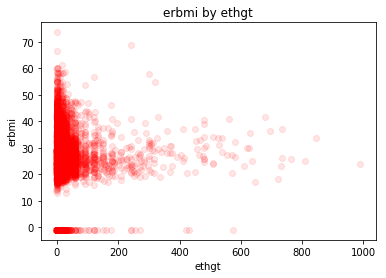

Pearson's correlation coefficient: 
(0.010488591510736237, 0.2667795815137417)


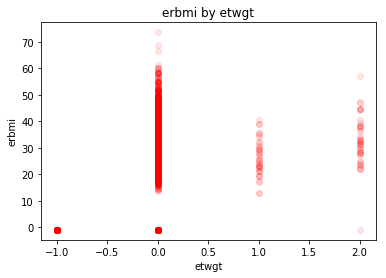

Pearson's correlation coefficient: 
(0.2769360775056125, 1.5767871120700381e-196)


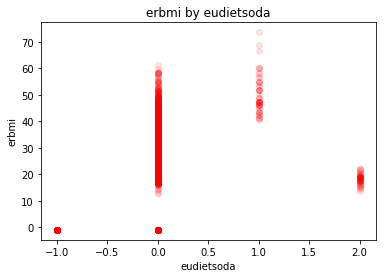

Pearson's correlation coefficient: 
(0.5619581612960601, 0.0)


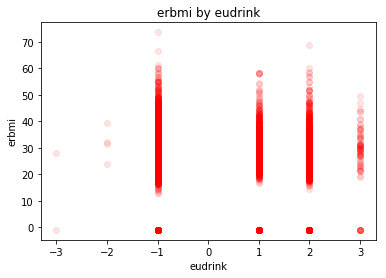

Pearson's correlation coefficient: 
(0.032292851113081285, 0.0006264528787216816)


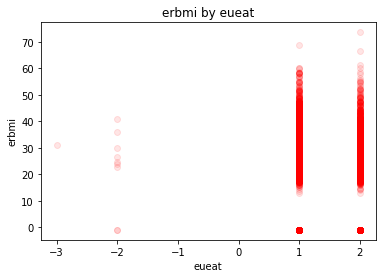

Pearson's correlation coefficient: 
(-0.021066750406260396, 0.025701791198075134)


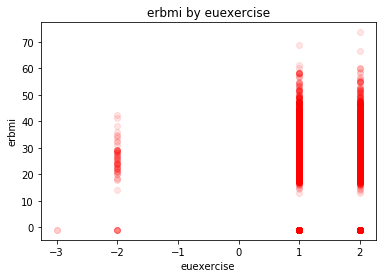

Pearson's correlation coefficient: 
(0.016433783309351874, 0.08185145210742654)


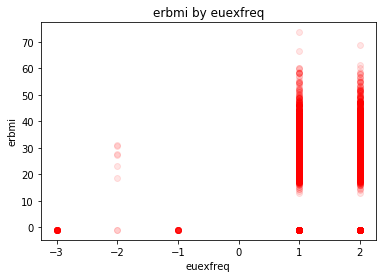

Pearson's correlation coefficient: 
(0.15271381473206272, 1.7761977326886747e-59)


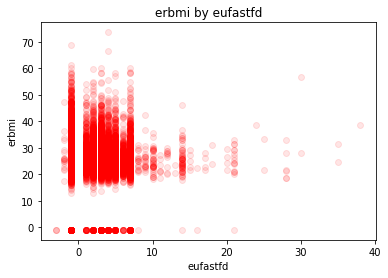

Pearson's correlation coefficient: 
(-0.05788906575915939, 8.561854192216245e-10)


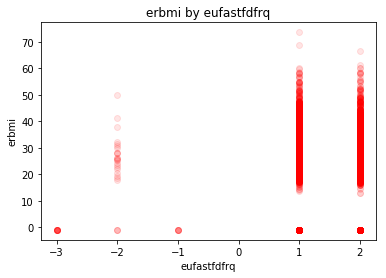

Pearson's correlation coefficient: 
(-0.02054123781360802, 0.02962775569160144)


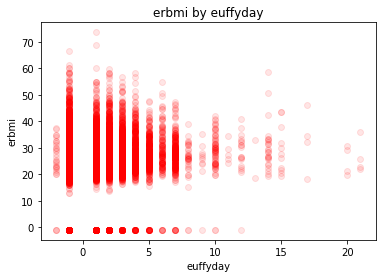

Pearson's correlation coefficient: 
(0.07172286280835873, 2.883477168704621e-14)


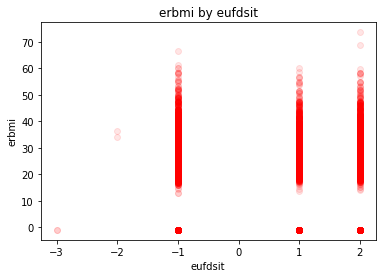

Pearson's correlation coefficient: 
(0.06647167514432992, 1.8482804201495237e-12)


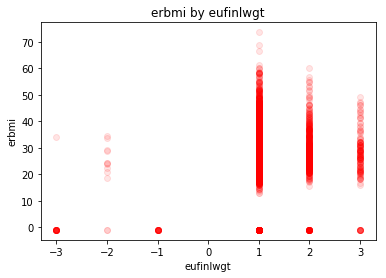

Pearson's correlation coefficient: 
(0.11289511827045201, 3.955531381276837e-33)


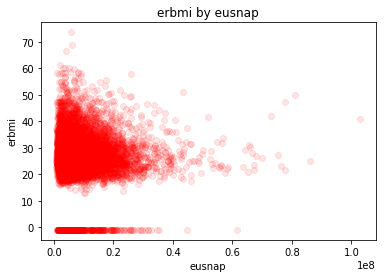

Pearson's correlation coefficient: 
(-0.0004273133087427987, 0.9639146029615006)


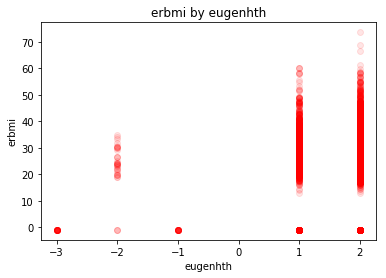

Pearson's correlation coefficient: 
(0.07448915691078582, 2.8453713781711333e-15)


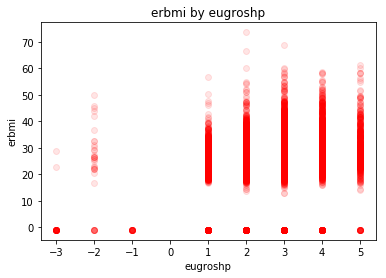

Pearson's correlation coefficient: 
(0.23983040136853986, 1.9747536431817068e-146)


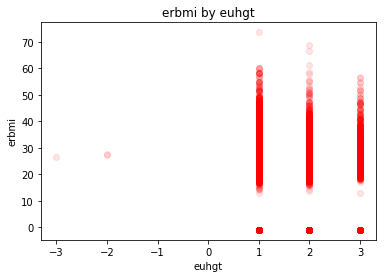

Pearson's correlation coefficient: 
(0.02645110998628911, 0.005094461995552331)


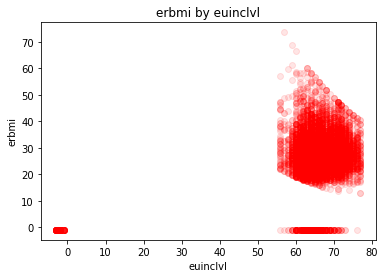

Pearson's correlation coefficient: 
(0.3581223704853361, 0.0)


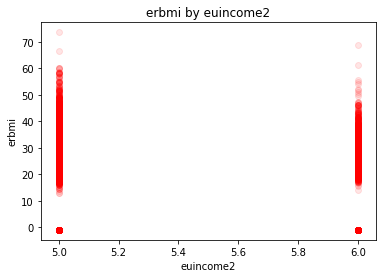

Pearson's correlation coefficient: 
(-0.002815487592363462, 0.7656343729447261)


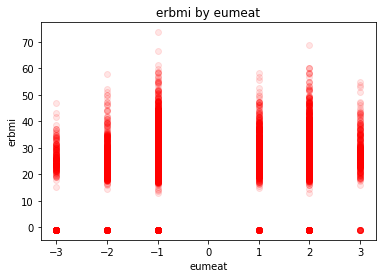

Pearson's correlation coefficient: 
(0.09903619040304006, 7.663163959603834e-26)


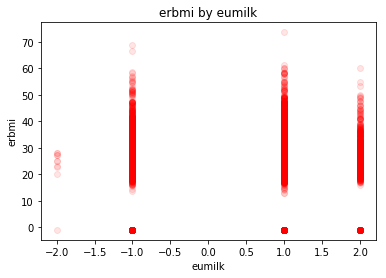

Pearson's correlation coefficient: 
(-0.03239147129573559, 0.0006028149246267929)


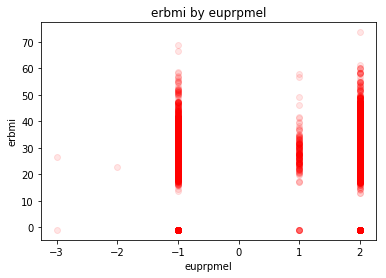

Pearson's correlation coefficient: 
(-0.02482672205075272, 0.008565335080672927)


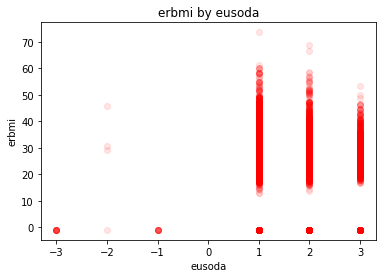

Pearson's correlation coefficient: 
(0.059404841268495705, 3.073153376729217e-10)


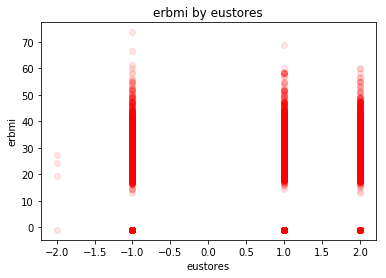

Pearson's correlation coefficient: 
(0.013055671837989745, 0.16687125758118443)


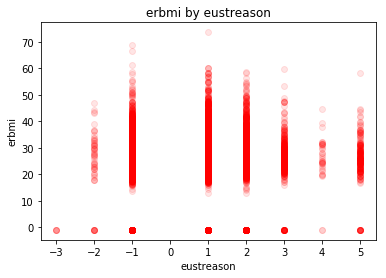

Pearson's correlation coefficient: 
(-0.00917270399692517, 0.33145875686058124)


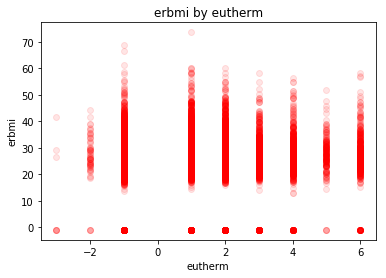

Pearson's correlation coefficient: 
(-0.011037382315471368, 0.24255772123659092)


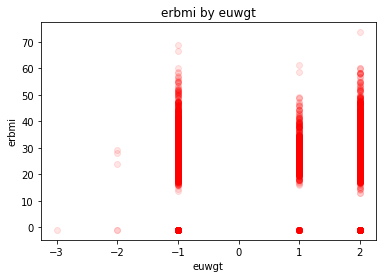

Pearson's correlation coefficient: 
(-0.00025008369220314665, 0.9788764056138232)


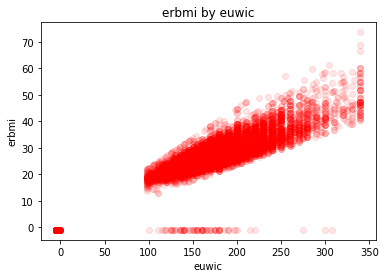

Pearson's correlation coefficient: 
(0.8915059751238806, 0.0)


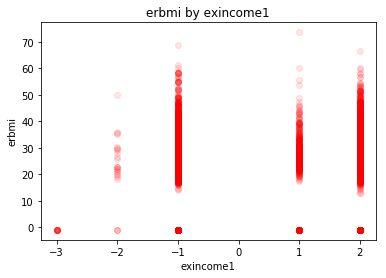

Pearson's correlation coefficient: 
(-0.02728273679985548, 0.003863517303041867)


In [70]:
for i in range(0,33):
    plot(x = X[:, i], \
         xlabel = dataset.columns[i+1], \
         y = y, \
         ylabel = dataset.columns[34])

# One Hot Encoding  

In [76]:
#dataset_numerical = dataset[numerical_columns]
#dataset_categorical = dataset[categorical_columns]
#dataset_target = dataset[target_column]

#dataset_categorical_c = pd.Categorical(dataset_categorical)
#dataset_categorical_c=pd.get_dummies(dataset_categorical_c, prefix = 'category')
#print(dataset_categorical.head())
#print(dataset_categorical_c.head())

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# Apply LabelEncoder to multiple columns: https://stackoverflow.com/a/31939145
X1 = pd.DataFrame(X).apply(LabelEncoder().fit_transform).values

# OHE for multiple columns using pd.get_dummies: https://stackoverflow.com/a/44601764
# Another get_dummies example: http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
# OHE vs. get_dummies: https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417
X_df = pd.DataFrame(X1, columns=all_columns[:-1])
X_dummies = pd.get_dummies(X_df, columns=categorical_columns)#,prefix='OHE')
X1 = X_dummies.values

#used this to confirm the original column was removed
#print(list(X_dummies.columns.values))



# Classifying BMI

NIH classifies BMI in the following ranges

 
BMI Categories: 
- Underweight = <18.5
- Normal weight = 18.5–24.9 
- Overweight = 25–29.9 
- Obesity = BMI of 30 or greater

In [77]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies,y,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [78]:
#Fitting Multiple Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
mlrObj = LinearRegression()
mlrObj.fit(X_train,y_train)

#Predicting on the Test Set
y_pred = mlrObj.predict(X_test)

In [79]:
#Mean squared error for the model 
from sklearn.metrics import mean_squared_error

print('Mean squared error of the model on the test set: ')
print(mean_squared_error(y_test, y_pred))

Mean squared error of the model on the test set: 
5.78638439349922e+24


In [81]:
print('Model intercept: ')
print(mlrObj.intercept_)

print('\n')
print('Model coefficients: ')
i=0
for i in range(0,X_dummies.shape[1]-1):
    print(X_dummies.columns[i] + ': ', mlrObj.coef_[i])
    

Model intercept: 
26.23928205789491


Model coefficients: 
ertpreat:  -0.03649865724493305
ertseat:  0.02186884283499252
euexfreq:  0.023224358244573362
eufastfdfrq:  0.011323144730751258
eufinlwgt:  -0.012776896151184908
euhgt:  -3.6276498533198698
euwgt:  7.360745909292331
exincome1:  0.16865056660759015
eeincome1_0:  1643995474039.1814
eeincome1_1:  1668901434771.6077
eeincome1_2:  671169500207.2827
eeincome1_3:  -3676366723622.3716
eeincome1_4:  -235807309799.05203
eeincome1_5:  -101557562096.45888
erhhch_0:  1881558203387.851
erhhch_1:  1228945814919.5889
erhhch_2:  2214886194313.166
erincome_0:  -2458200168259.7876
erincome_1:  3177480791069.51
erincome_2:  -111515905266.24042
erincome_3:  -144580613356.06885
erincome_4:  -822002203256.3608
erincome_5:  758303175720.5643
erspemch_0:  -398509331124.70276
erspemch_1:  -117364335597.15295
erspemch_2:  -69428729751.57222
erspemch_3:  -114016111426.82878
erspemch_4:  -98607032721.14703
erspemch_5:  -395726721978.19385
ethgt_0:  -35631